# Load package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from utils import *

2023-04-15 21:14:22.657277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 21:14:22.861647: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-15 21:14:22.861671: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-15 21:14:23.828697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Load data

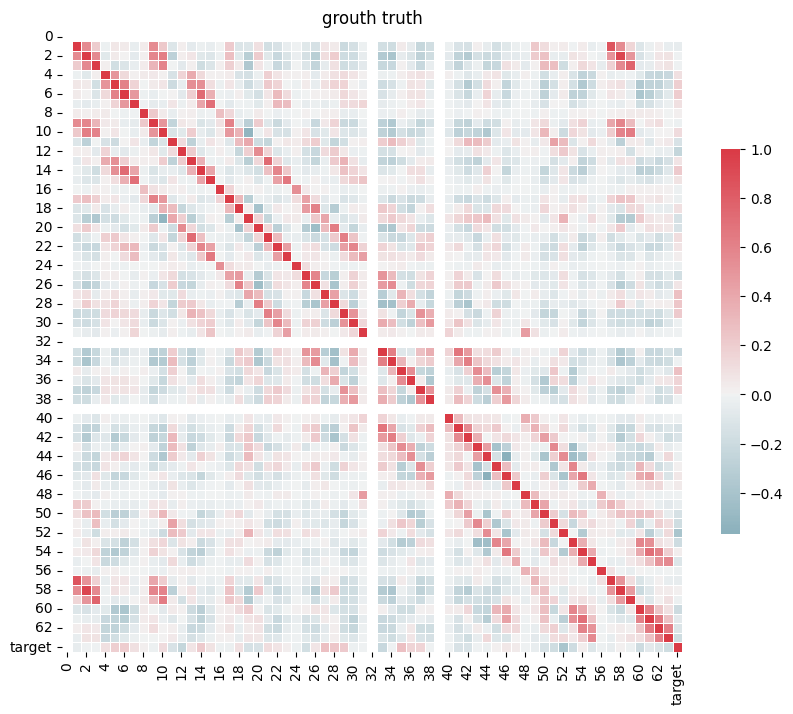

In [2]:
# Load the digit dataset
digits = load_digits()

# Create a dataframe from the digits data
df = pd.DataFrame(digits.data)
df['target'] = digits.target
# Compute the correlation matrix
corr_gt = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gt, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("grouth truth")
plt.show()


In [3]:
def randomly_missing_img(data,perc,Type='randomly'):
    '''
    perc : percent of each img -> missing pixel / features
    '''
    result = data.copy()
    def add_noise_to_image(image, p=0.1):
        """
        Adds random noise to an image by randomly replacing some pixels with NaN.

        Args:
            image (ndarray): The input image to add noise to.
            p (float): The probability of replacing each pixel with NaN.

        Returns:
            ndarray: The image with added noise.
        """
        # Copy the input image to avoid modifying the original array
        noisy_image = np.copy(image)

        # Create a mask of the same shape as the input image
        mask = np.random.uniform(size=image.shape)

        # Replace some pixels in the mask with NaN based on the probability p
        mask[mask < p] = np.nan

        # Apply the mask to the input image to create the noisy image
        noisy_image = noisy_image * mask

        return noisy_image

    for i in range(len(data)):
        if Type=='randomly':
            result.iloc[i] = add_noise_to_image(data.iloc[i],p=perc)
    
    return result

In [4]:
perc = 0.3
new_df = randomly_missing_img(df,perc)
new_df.shape

(1797, 65)

In [5]:
new_df['target'] = digits.target

In [6]:
new_df = apply_normalize(new_df)

# RMSE

| Giaỉ thuật    | RMSE  |
|---------------|-------|
|MICE           |0.0462 |
|MissForest     |0.0340 |
|ALS            |0.0788 |
|PCA            |0.0803 |
|KNN            |0.0385 |
|EM             |0.0788 |
|Mean           |0.0788 |
|Dpers          |0.0494 |
|GAIN           |0.0452 |
|GINN           |0.0640 |

# Model Imputations

## Mice

In [7]:
img_impute_mice = impute_with_mice(new_df,new_df.iloc[0].isna().sum()) # lay tat ca ? or lay 1 

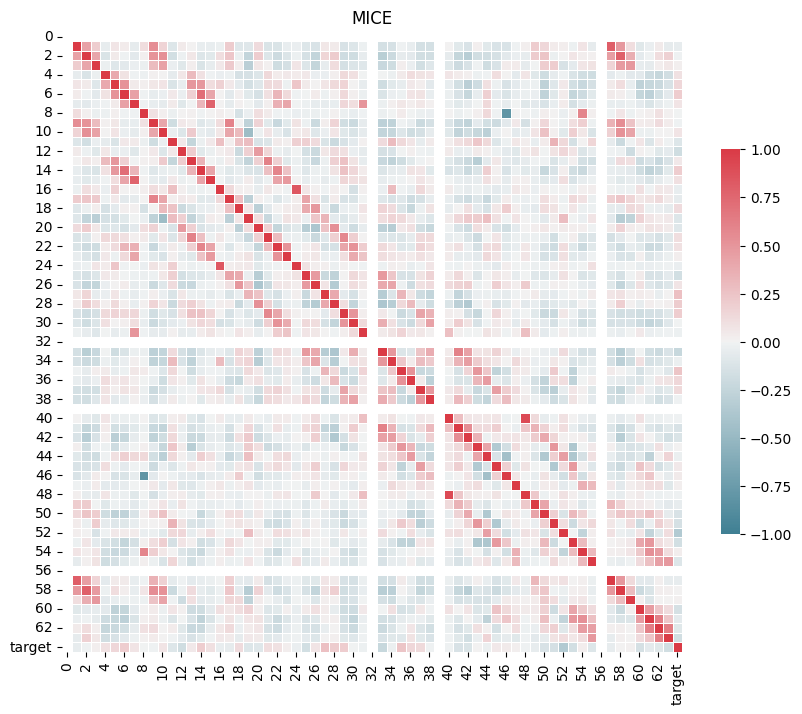

In [8]:
corr_mice = img_impute_mice.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mice, cmap=cmap, vmin = -1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("MICE")
plt.show()


In [9]:
covariance_rmse(corr_gt, corr_mice)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.05316125363792533


1         0.035596
2         0.060042
3         0.062443
4         0.048545
5         0.062627
            ...   
60        0.074611
61        0.045299
62        0.037229
63        0.034671
target    0.021900
Length: 61, dtype: float64

## soft impute als

In [10]:
img_softimpute = soft_impute_als_df(new_df)

[SoftImpute] Max Singular Value of X_init = 76.246645
[SoftImpute] Iter 1: observed MAE=0.025885 rank=61
[SoftImpute] Iter 2: observed MAE=0.025907 rank=61
[SoftImpute] Iter 3: observed MAE=0.025928 rank=61
[SoftImpute] Iter 4: observed MAE=0.025948 rank=61
[SoftImpute] Iter 5: observed MAE=0.025967 rank=61
[SoftImpute] Iter 6: observed MAE=0.025984 rank=61
[SoftImpute] Iter 7: observed MAE=0.026000 rank=61
[SoftImpute] Iter 8: observed MAE=0.026015 rank=61
[SoftImpute] Iter 9: observed MAE=0.026028 rank=61
[SoftImpute] Iter 10: observed MAE=0.026041 rank=61
[SoftImpute] Iter 11: observed MAE=0.026053 rank=61
[SoftImpute] Iter 12: observed MAE=0.026064 rank=61
[SoftImpute] Iter 13: observed MAE=0.026074 rank=61
[SoftImpute] Iter 14: observed MAE=0.026084 rank=61
[SoftImpute] Iter 15: observed MAE=0.026092 rank=61
[SoftImpute] Iter 16: observed MAE=0.026100 rank=61
[SoftImpute] Iter 17: observed MAE=0.026107 rank=61
[SoftImpute] Iter 18: observed MAE=0.026114 rank=61
[SoftImpute] Iter 1

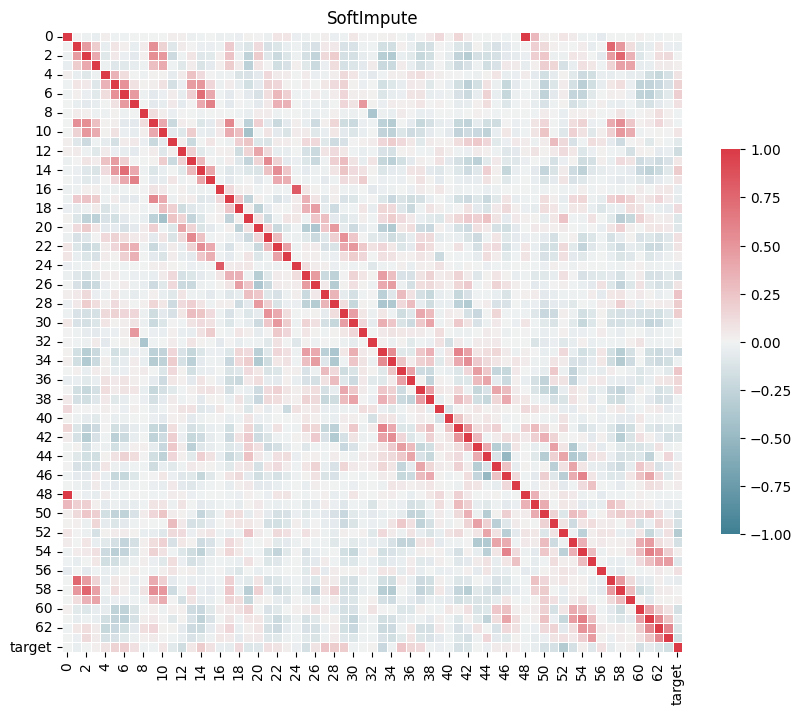

In [11]:
corr_softimpute = img_softimpute.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_softimpute, cmap=cmap, vmin = -1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("SoftImpute")
plt.show()

In [12]:
covariance_rmse(corr_gt, corr_softimpute)

Elements [ 0 32 39] are NaN and will be removed.
Total :  0.044913019052881614


1         0.030508
2         0.051064
3         0.071084
4         0.045957
5         0.041258
            ...   
60        0.061029
61        0.036446
62        0.031789
63        0.027467
target    0.027212
Length: 62, dtype: float64

## impute pca

In [13]:
img_imputepca = impute_with_pca(new_df)

Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold


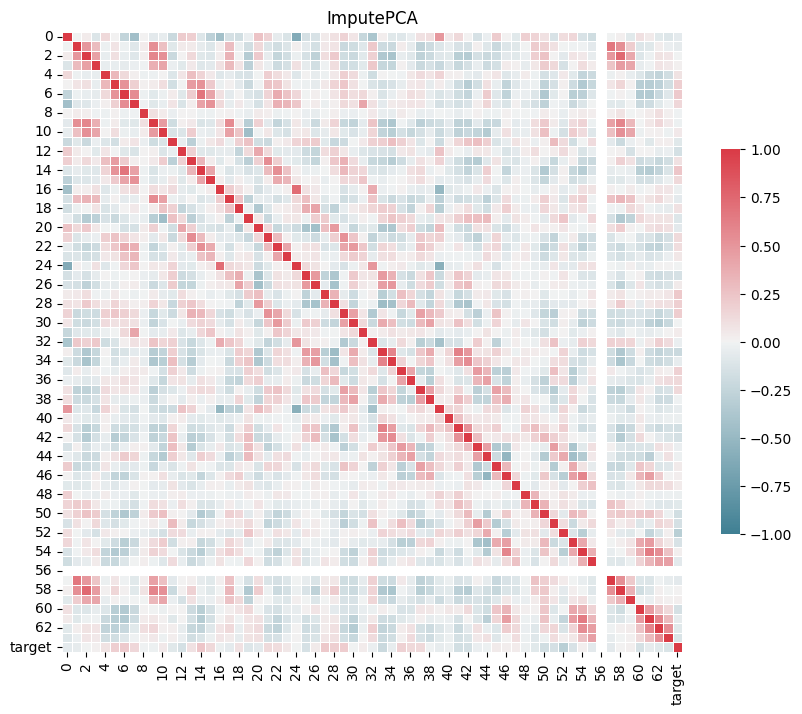

In [14]:
corr_imputepca = img_imputepca.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_imputepca, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("ImputePCA")
plt.show()

In [15]:
covariance_rmse(corr_gt,corr_imputepca)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.051717771550457314


1         0.049482
2         0.045692
3         0.075149
4         0.048940
5         0.050599
            ...   
60        0.054996
61        0.037761
62        0.044663
63        0.054934
target    0.036197
Length: 61, dtype: float64

## knn

In [16]:
img_knn = impute_with_knn(new_df)

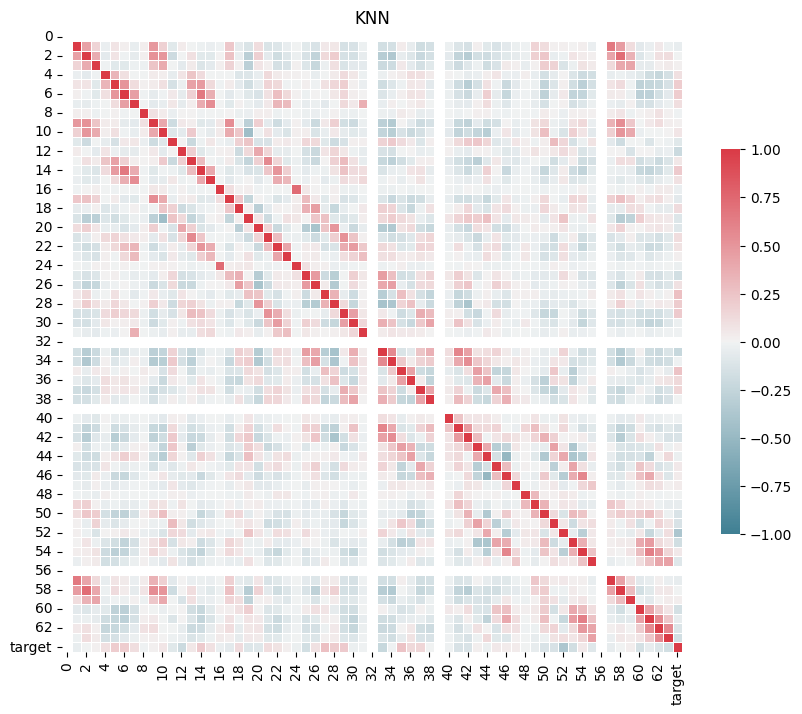

In [17]:
corr_knn = img_knn.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_knn, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("KNN")
plt.show()

In [18]:
covariance_rmse(corr_gt,corr_knn)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.04316979258273853


1         0.041711
2         0.055116
3         0.074965
4         0.042499
5         0.042475
            ...   
60        0.056918
61        0.037577
62        0.033074
63        0.029317
target    0.020234
Length: 61, dtype: float64

## dpers

In [19]:
corr_dpers = dpers(new_df.to_numpy())
cols = [i for i in range(len(corr_dpers)-1)]
cols.append('target') 
corr_dpers = pd.DataFrame(data=corr_dpers,columns=cols)

100%|██████████| 2080/2080 [00:00<00:00, 3047.27it/s]


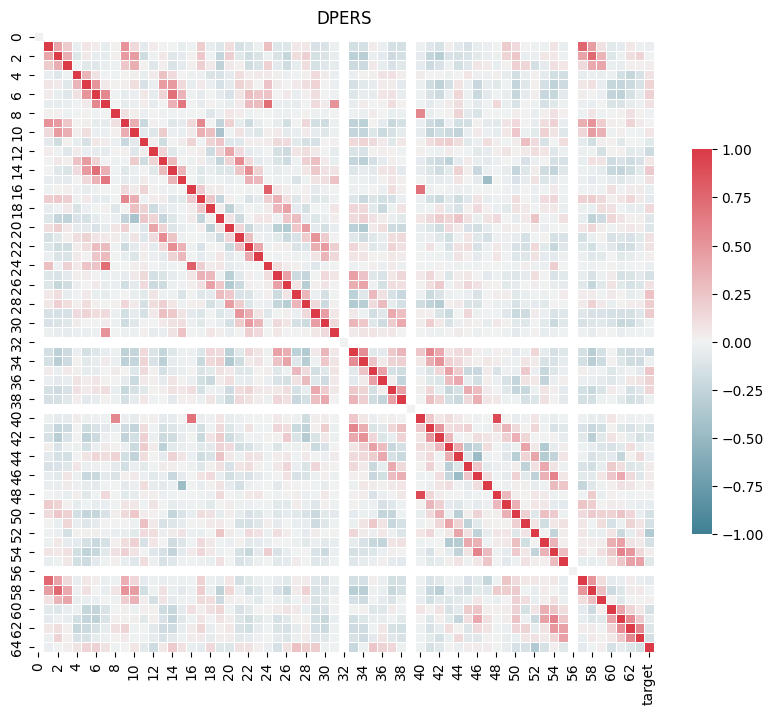

In [20]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_dpers, cmap=cmap, vmax=1,vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("DPERS")
plt.show()

In [21]:
covariance_rmse(corr_gt,corr_dpers)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.059480628150446455


1         0.053764
2         0.065400
3         0.083474
4         0.050358
5         0.061274
            ...   
60        0.072139
61        0.047554
62        0.038342
63        0.035131
target    0.025108
Length: 61, dtype: float64

## missforest

In [22]:
img_missforest = impute_with_missforest(new_df)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


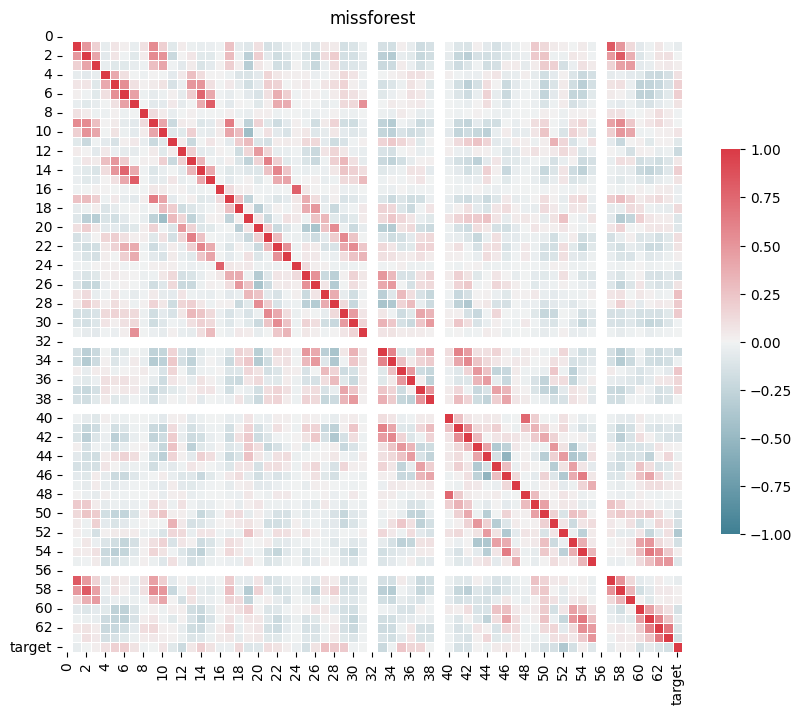

In [23]:
corr_missforest = img_missforest.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_missforest, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("missforest")
plt.show()

In [24]:
covariance_rmse(corr_gt,corr_missforest)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.037374719564195046


1         0.025659
2         0.043811
3         0.064382
4         0.039378
5         0.034452
            ...   
60        0.052668
61        0.029699
62        0.028948
63        0.028075
target    0.019966
Length: 61, dtype: float64

## EM

In [25]:
# Create an imputer object with the EM strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on the dataframe
img_em = pd.DataFrame(imputer.fit_transform(new_df))
img_em = img_em.rename(columns={64:'target'})

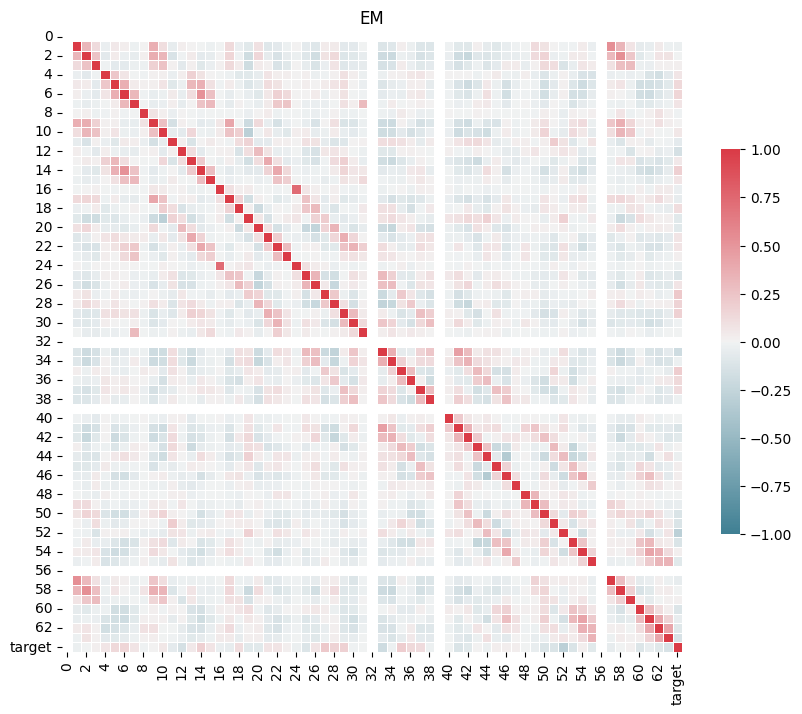

In [26]:
corr_em = img_em.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_em, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("EM")
plt.show()

In [27]:
covariance_rmse(corr_gt,corr_em)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.08375143754909345


1         0.080693
2         0.117603
3         0.117166
4         0.069884
5         0.089722
            ...   
60        0.105674
61        0.091790
62        0.077949
63        0.060290
target    0.038874
Length: 61, dtype: float64

## Means Imputate

In [28]:
# Create an imputer object with the mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the dataframe
img_meansimpute = pd.DataFrame(imputer.fit_transform(new_df))
img_meansimpute = img_meansimpute.rename(columns={64:'target'})

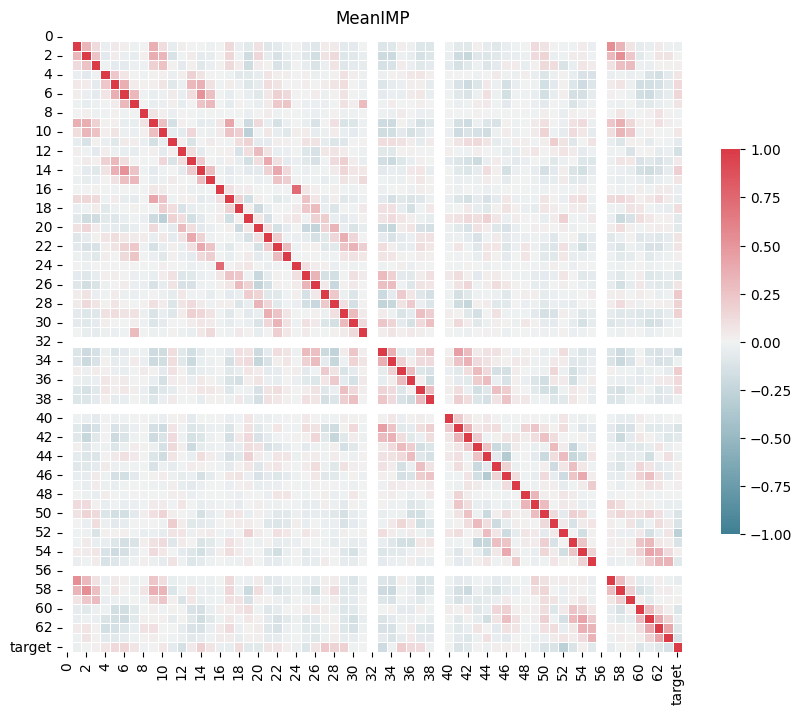

In [29]:
corr_meansimpute = img_meansimpute.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_meansimpute, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("MeanIMP")
plt.show()

In [30]:
covariance_rmse(corr_gt,corr_meansimpute)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.08375143754909345


1         0.080693
2         0.117603
3         0.117166
4         0.069884
5         0.089722
            ...   
60        0.105674
61        0.091790
62        0.077949
63        0.060290
target    0.038874
Length: 61, dtype: float64

## gain 

In [31]:
# img_gain, model = gain_impute(new_df, hint_probability=0.1, batch_size=128,epochs=20) # reomve model in function 
img_gain = gain_impute(new_df, hint_probability=0.1, batch_size=128,epochs=20)

2023-04-15 21:21:16.000134: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-15 21:21:16.000170: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-15 21:21:16.000196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2023-04-15 21:21:16.000467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


57/57 [==============================] - 0s 3ms/step


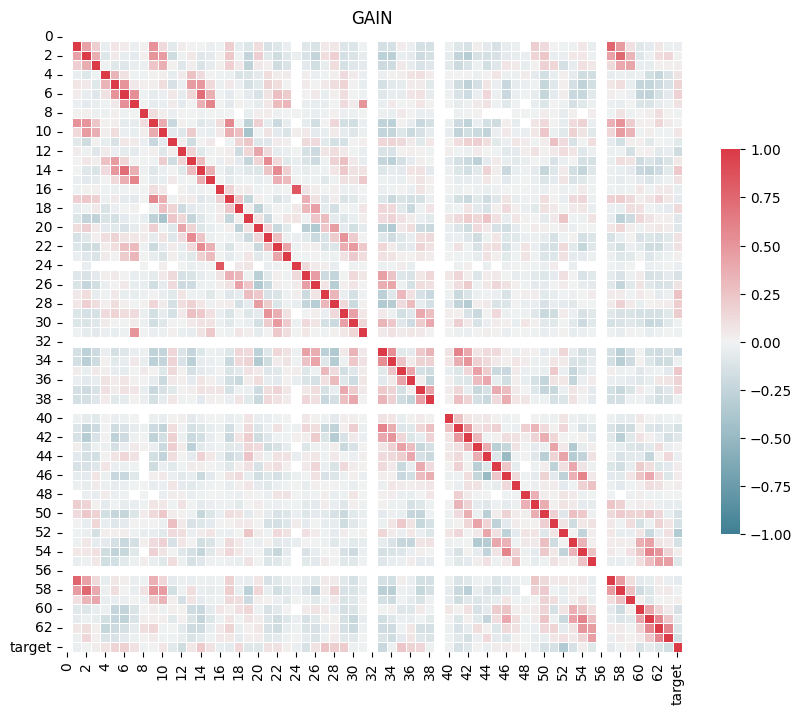

In [32]:
corr_gain = img_gain.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gain, cmap=cmap,vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("GAIN")
plt.show()

In [33]:
covariance_rmse(corr_gt,corr_gain)

Elements [ 0 32 39 56] are NaN and will be removed.
Total :  0.05064847005512915


1         0.038224
2         0.062372
3         0.079936
4         0.050147
5         0.048489
            ...   
60        0.071965
61        0.046237
62        0.037819
63        0.033298
target    0.025138
Length: 61, dtype: float64

## ginn

In [34]:
new_df = df.copy()
new_df = apply_normalize(new_df)
impute_ginn_df = ginn_imputate(new_df,perc)
# impute_ginn_df = pd.DataFrame(data=impute_ginn_df,columns=df.columns)

GINN is running on cpu


100%|██████████| 21/21 [00:02<00:00,  8.69it/s]


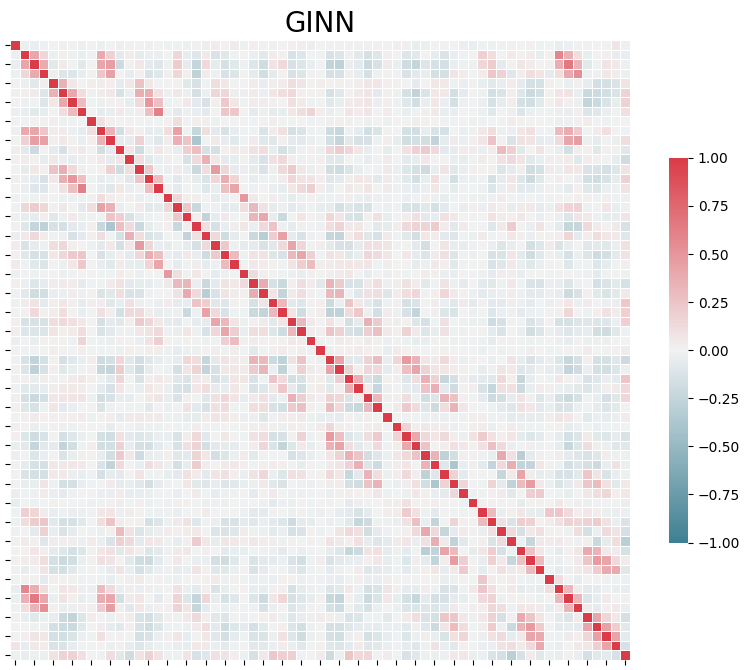

In [35]:
corr_ginn = impute_ginn_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_ginn, cmap=cmap, vmin = -1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("GINN", fontsize=20)
# ax.set_xlabel("") # remove the x-axis label
# ax.set_ylabel("") # remove the y-axis label
ax.set_xticklabels([]) # remove the labels on the x-axis
ax.set_yticklabels([]) # remove the labels on the y-axis
plt.show()

In [36]:
covariance_rmse(corr_gt, corr_ginn)

Elements [ 0 32 39] are NaN and will be removed.
Total :  0.062141272278459184


1         0.062951
2         0.078081
3         0.067847
4         0.048086
5         0.064614
            ...   
60        0.072046
61        0.069929
62        0.061733
63        0.049656
target    0.025919
Length: 62, dtype: float64

# Viz

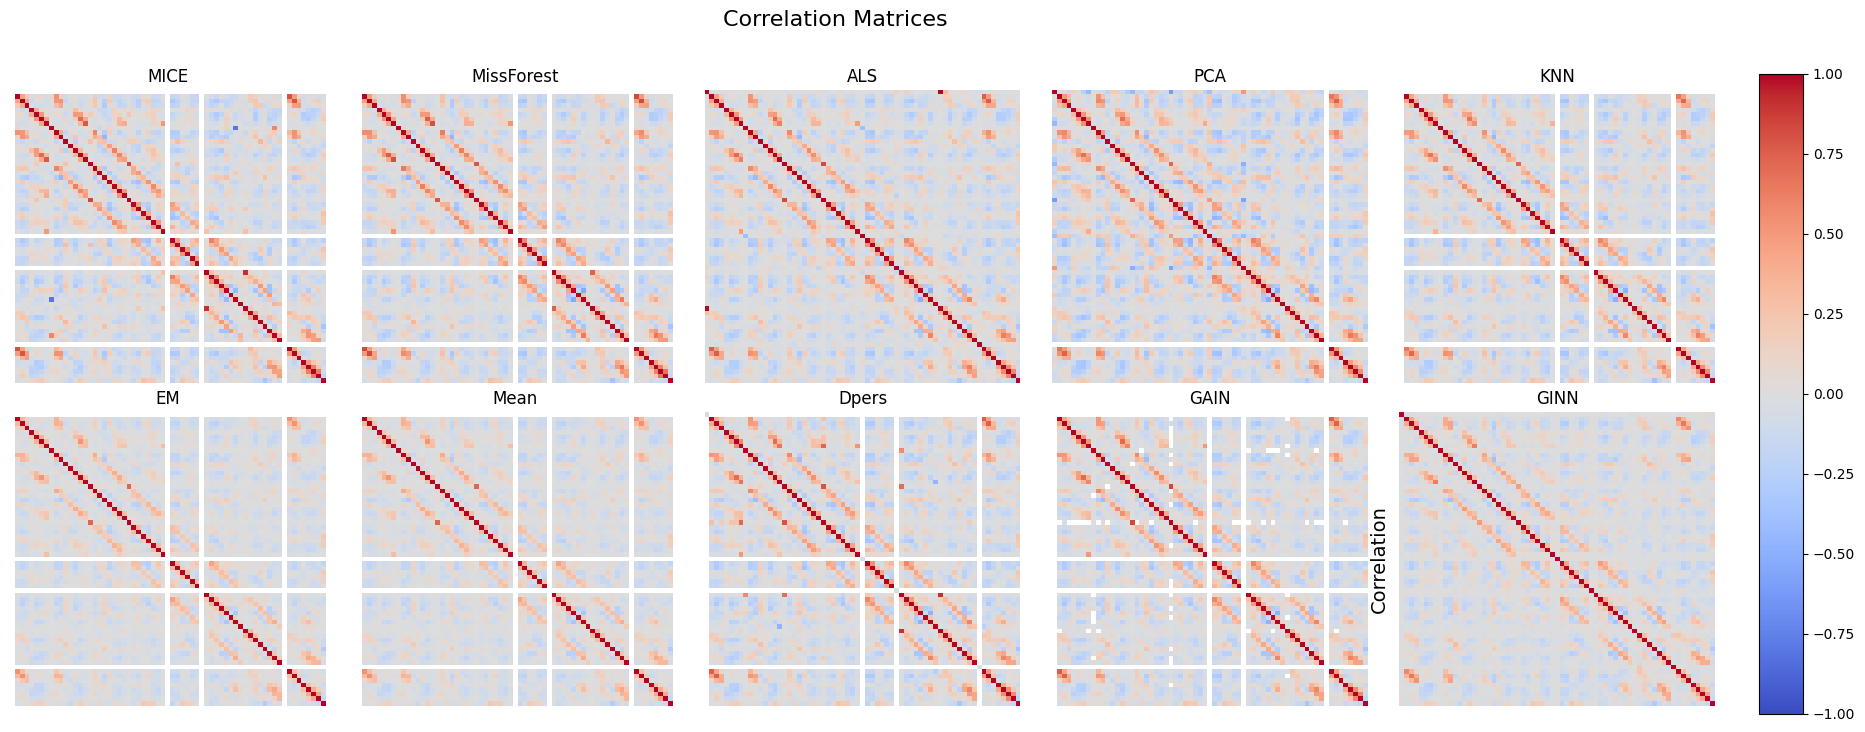

In [40]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=5,nrows=2, figsize=(22, 8))

matrix_total = [corr_mice, corr_missforest, corr_softimpute, corr_imputepca, corr_knn,
             corr_em, corr_meansimpute, corr_dpers, corr_gain, corr_ginn]

row_title = ['MICE', 'MissForest', 'ALS', 'PCA', 'KNN',
             'EM', 'Mean', 'Dpers', 'GAIN', 'GINN']

# Plot each correlation matrix on the appropriate subplot
for i, matrix in enumerate(matrix_total):
    row = i // 5
    col = i % 5
    if col == 4:
        im = sns.heatmap(matrix, cmap='coolwarm', cbar=False, ax=axs[row, col], vmin=-1, vmax=1)
    else:
        im = sns.heatmap(matrix, cmap='coolwarm', cbar=False, ax=axs[row, col], vmin=-1, vmax=1)
    axs[row, col].set_title(f'{row_title[i]}')
    

# # Create a colorbar axis
# divider = make_axes_locatable(axs[0, 4])
# cax = divider.append_axes('right', size='5%', pad=0.05)

# # Plot the colorbar
# cbar = fig.colorbar(im, cax=cax)
# cbar.ax.tick_params(labelsize=14)

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(im.get_children()[0], cax=cbar_ax)
# Set the label for the colorbar
axs[1, 4].set_ylabel('Correlation', fontsize=14)

# Add a title for the entire figure
fig.suptitle('Correlation Matrices', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Hide the ticks and labels on all subplots
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Show the figure
plt.savefig('Digits_final.png',dpi=1200)
plt.show()